## Jupyter Notebook Widget Demo for TARDIS ##

Based on the quickstart and Qt-GUI, I try to make the bokeh plot of the spectrum more interactive. You can see it as follow.

In [1]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

/usr/local/bin/miniconda3/envs/tardis/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/usr/depot/tardis/tardis/io/util.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


#### Downloading the atomic data ####

In [ ]:
# the data is automatically downloaded
download_atom_data('kurucz_cd23_chianti_H_He')

#### Running the simulation (long output) ####

In [2]:
#TARDIS now uses the data in the data repo
sim = run_tardis('tardis_example.yml')

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:74)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /root/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:29)
[py.warnings         ][WARNING]  /usr/local/bin/miniconda3/envs/tardis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:99)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:184)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:187)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.96915e+42 e

[tardis.simulation.base][INFO   ]  t_inner 10123.177 K -- next t_inner 11180.783 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 10/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.28170e+43 erg / s Luminosity absorbed = 4.19511e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      10666.223660  11427.410445  0.445097  0.500788
	5      11000.288585  11612.349822  0.163424  0.193129
	10     10822.884326  11373.245169  0.101641  0.121622
	15     10384.181273  11047.955461  0.078432  0.090937

 (base.py:350)
[tardis.simulation.base][INFO   ]  t_inner 11180.783 K -- next t_inner 10164.432 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 11/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 8.79074e+42 erg / s Lum

[tardis.simulation.base][INFO   ]  t_inner 10314.623 K -- next t_inner 11009.102 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 20/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.21062e+43 erg / s Luminosity absorbed = 3.88405e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Simulation finished in 20 iterations and took 30.47 s (base.py:308)


#### Plotting the Spectrum ####

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


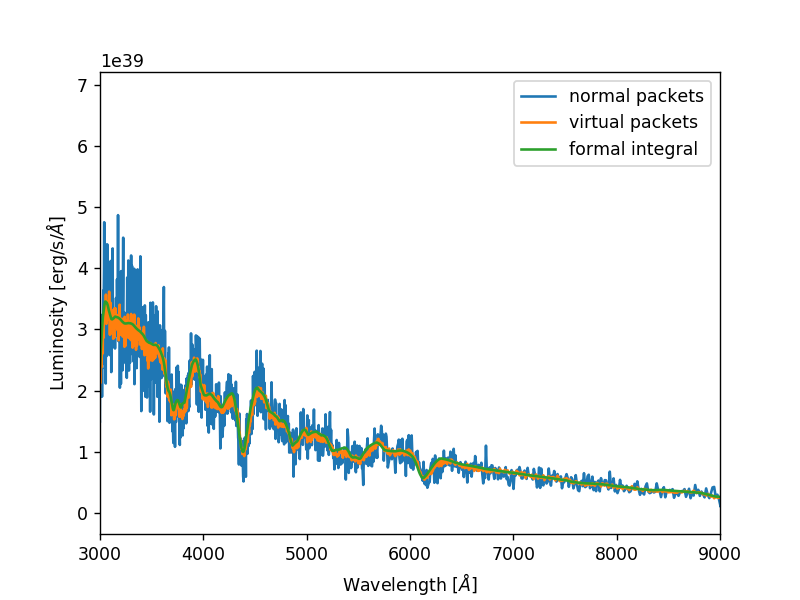

(3000, 9000)

In [3]:
%pylab notebook

spectrum = sim.runner.spectrum
spectrum_virtual = sim.runner.spectrum_virtual
spectrum_integrated = sim.runner.spectrum_integrated

plot(spectrum.wavelength, spectrum.luminosity_density_lambda, label='normal packets')
plot(spectrum.wavelength, spectrum_virtual.luminosity_density_lambda, label='virtual packets')
plot(spectrum.wavelength, spectrum_integrated.luminosity_density_lambda, label='formal integral')
xlabel('Wavelength [$\AA$]')
ylabel('Luminosity [erg/s/$\AA$]')
legend()
xlim(3000, 9000)

### Plotting the Interactive Spectrum ###

In [4]:
# install bokeh if it is not in env
!pip install bokeh

In [5]:
from bokeh.models import ColumnDataSource
# prepare some data
source = ColumnDataSource(data=dict(
    x=sim.runner.spectrum.wavelength, 
    y1=sim.runner.spectrum.luminosity_density_lambda,
    y2=sim.runner.spectrum_virtual.luminosity_density_lambda,
    y3=sim.runner.spectrum_integrated.luminosity_density_lambda))
source

ColumnDataSource(id='1001', ...)

In [6]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.palettes import Spectral4
from bokeh.layouts import column
from bokeh.models import CustomJS, RangeSlider, HoverTool

# output to jupyter notebook
output_notebook()

# create a new plot
p = figure(
    title="Spectrum", 
    x_axis_label='Wavelength [A]', 
    y_axis_label='Luminosity [erg/s/A]',
    plot_width=800, plot_height=400, background_fill_color="#fafafa",
    tools=['pan', 'xwheel_zoom', 'ywheel_zoom', 'wheel_zoom', 'save', 'reset', 'hover'])
p.title.text_font_size = "25px"
p.title.align = "center"

# add some renderers
for data, name, color in zip(
    ['y1', 'y2', 'y3'], 
    ['normal packets', 'virtual packets', 'formal integral'], 
    Spectral4):
    p.line('x', data, source=source, line_width=2, color=color, alpha=0.8,
           muted_color=color, muted_alpha=0.2, legend_label=name)
p.legend.click_policy="mute"

# create a range slider
[start, end] = [min(sim.runner.spectrum.wavelength).value, max(sim.runner.spectrum.wavelength).value]
x_range_slider = RangeSlider(start=start, 
                             end=end, 
                             value=[start, end],
                             step=.1, 
                             title="Xrange")
xcallback = CustomJS(args=dict(p=p), code="""
    var a = cb_obj.value;
    p.x_range.start = a[0];
    p.x_range.end = a[1];
""")
x_range_slider.js_on_change('value', xcallback)

# show the results
layout = column(p, x_range_slider)
show(layout)

Loading BokehJS ...

[py.warnings         ][WARNING]  /usr/local/bin/miniconda3/envs/tardis/lib/python3.6/site-packages/bokeh/plotting/_tools.py:201: UserWarning: WheelZoomTool are being repeated
  warnings.warn("%s are being repeated" % ",".join(repeated_tools))
 (warnings.py:99)


Tips:

1. Use buttons in the top-right corner to pan, to zoom(on the x-axis or y-axis).
2. Hover on a line in the legend to get data values.
3. Click on a line in the legend to mute it.
4. You can resize this range slider and move it.

In [7]:
from bokeh.models import ColorBar, LinearColorMapper, DataTable, NumberFormatter, TableColumn
from bokeh.plotting import figure
from bokeh.transform import transform
from bokeh.palettes import Plasma256
from bokeh.layouts import row

# create a src data
shell_src = ColumnDataSource(data=dict(
    shell=[str(x) for x in range(1, 21)], 
    temp=sim.model.t_radiative, 
    wave=sim.model.w, 
    density=sim.model.density))

# output to jupyter notebook
output_notebook()

# create a color mapper
t_min, t_max = [min(shell_src.data['temp']).value, max(shell_src.data['temp']).value]
mapper = LinearColorMapper(palette=Plasma256, low=t_min, high=t_max)

# create a new plot
p = figure(    
    title="Rad.Temp vs Shell", 
    x_axis_label='Shell', 
    y_axis_label='Rad.Temp[K]',
    x_range=shell_src.data['shell'], 
    plot_width=600, plot_height=400, 
    tools=['pan', 'wheel_zoom', 'save', 'reset', 'hover'])
p.y_range.start = 10000
p.y_range.end = t_max
p.title.text_font_size = "25px"

# create a data table
nfmt = NumberFormatter(format='0[.]0000')
columns = [
        TableColumn(field="shell", title="Shell"),
        TableColumn(field="temp", title="Rad.Temp[K]", formatter=nfmt),
        TableColumn(field="wave", title="Wavelength", formatter=nfmt)]
data_table = DataTable(source=shell_src, columns=columns, width=250, height=400, index_position=None)

# create a bar figure
p.vbar(x="shell", top="temp", width=1, source=shell_src, line_color=None, fill_color=transform("temp", mapper))
color_bar = ColorBar(color_mapper=mapper, location=(1, 0))
p.add_layout(color_bar, 'right')

# show with row layout
show(row(data_table, p))

Loading BokehJS ...

Tips:

1. Use buttons in the top-right corner to pan, to zoom.
2. Hover on a line in the legend to get data values.
3. Use the data table in the left to get more info.